# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 之前做過的處理

In [2]:
# 讀取資料檔
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [15]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])  
        else:
            app_train.drop(columns=col, inplace=True)
print(app_train.shape)
app_train.head()

(307511, 113)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH,age_grp,YEARS_BINNED
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,False,25.920548,"(20, 30]","(20, 30]"
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,45.931507,"(40, 50]","(40, 50]"
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,52.180822,"(50, 60]","(50, 60]"
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,52.068493,"(50, 60]","(50, 60]"
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,54.608219,"(50, 60]","(50, 60]"


In [16]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [17]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], bins=[0, 20, 30, 40, 50, 60, 70, 100])

In [21]:
age_groups  = app_train.groupby('YEARS_BINNED')['TARGET'].mean()
age_groups

C:\Users\chen2\AppData\Local\Temp\ipykernel_9164\3841196717.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups  = app_train.groupby('YEARS_BINNED')['TARGET'].mean()


YEARS_BINNED
(0, 20]           NaN
(20, 30]     0.114569
(30, 40]     0.095835
(40, 50]     0.076508
(50, 60]     0.061297
(60, 70]     0.049214
(70, 100]         NaN
Name: TARGET, dtype: float64

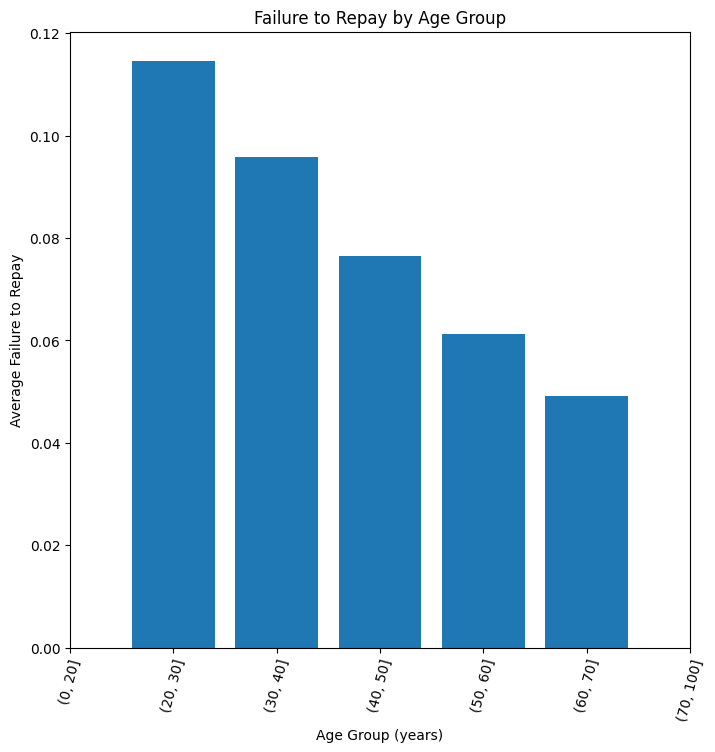

In [25]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups)
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');